# Part II - How employment status and rating affect loan amount disbursement and loan default

## by  Kose Bilali Salim


## Investigation Overview


> In this investigation, I am interested in finding out how employment status('Other', 'Employed', 'Full-time', 'Not employed', 'Self-employed','Retired', 'Part-time') and ProperRating affect loan amount disbursement and loan Default.

> I considered key variables like employment status,ProsperRating, LoanOriginalAmount,StatedMonthlyIncome, and Loan status for my investigations.


## Dataset Overview

> The Prosper Loan dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. I will explored a few variables both categorical variables.Out of the 113,937, some data were cleaned out for the investigation. The resulting dataframe used contained about 84853 non-null values.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

In [3]:
#Selected variables for analysis and visualizations
columns =  [
    'Term', 'LoanStatus', 'BorrowerRate', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'EmploymentStatus', 'CurrentDelinquencies',
     'StatedMonthlyIncome', 'TotalProsperLoans',
    'LoanOriginationDate','LoanOriginalAmount', 'Recommendations', 'Investors'
]
# re-assign the columns setup to a new dataframe variable
df_loans = df[columns]

In [18]:
# base color for charts
base_color = sb.color_palette()[0]

In [4]:
# Data wrangling and cleaning

# drop null values and reset index
df_loans = df_loans.dropna(subset=['ProsperRating (Alpha)'], axis=0).reset_index();

# fill  null values with 0
df_loans['TotalProsperLoans'] = df_loans['TotalProsperLoans'].fillna(0)

# convert datatype from objejct to datetime
df_loans['LoanOriginationDate'] = df_loans['LoanOriginationDate'].astype('datetime64')

# convert ProsperRating into ordered categorical type
ordinal_var = {'ProsperRating (Alpha)': ['AA','A','B','C','D','E','HR']} # dict of ordinal variables
for var in ordinal_var:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var[var])
    df_loans[var] = df_loans[var].astype(ordered_var)

## Distribution of Employment Status

* Debtors with employment status __Employed__ are the majority
* Followed my moderatly a small number of __Full-time__ employed debtors
* The least group who borrow loan are the debtors with **Part-time** employment status



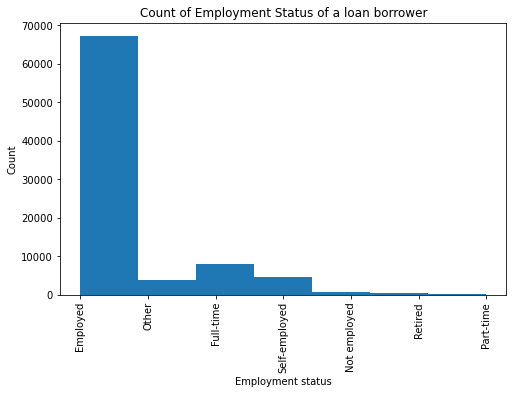

In [5]:
# histogram plot of employment status
bins = df_loans['EmploymentStatus'].nunique()
plt.figure(figsize=[8, 5])
plt.hist(data = df_loans, x = 'EmploymentStatus',bins=bins)
plt.xticks(rotation = 90);
plt.title('Count of Employment Status of a loan borrower')
plt.xlabel('Employment status')
plt.ylabel('Count')
plt.show()

## Distribution of StatedMonthlyIncome
* By taking the bins as a logarthmic value ie log scale, we still get a left skew, but this time with a stated monthly value of 5000 ie 5K.
* This distributions shows some kind of normal distributions- an Increase in monthly income does not increase the loan borrowing


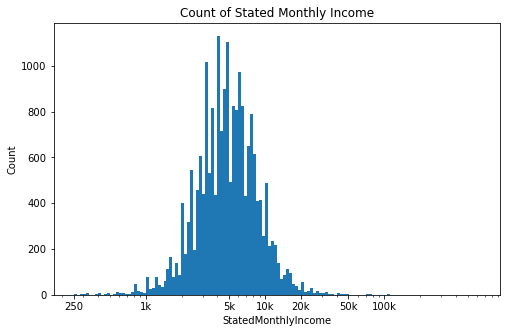

In [12]:
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(df_loans['StatedMonthlyIncome'].max())+log_binsize, log_binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df_loans, x = 'StatedMonthlyIncome', bins = bins)
plt.xscale('log')
plt.xticks([250,1e3, 5e3, 10e3, 20e3, 50e3, 100e3], [250, '1k', '5k', '10k', '20k', '50k','100k'])
plt.title('Count of Stated Monthly Income')
plt.xlabel('StatedMonthlyIncome')
plt.ylabel('Count')
plt.show()

## Distribution of Loan Status
* We can observe that most of the loans are the Current ones
* Completed loans falls the second with a count of about 20000.
* Other loans status falls betwee 15 days and 60 days delays, while those past 120 days delays are the least occurance.
* Since we are interested in the loan defaulted and loan completed, we will use pandas filtering to only have this two values


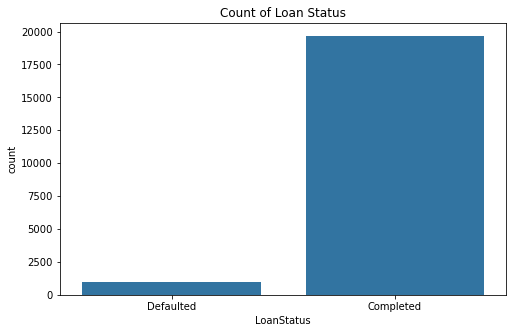

In [14]:
# filter loans based on Completed and Defaulted
df_loans = df_loans[(df_loans['LoanStatus']=='Completed') | (df_loans['LoanStatus']=='Defaulted')]
plt.figure(figsize=[8, 5]) # figure size
sb.countplot(data = df_loans, x = 'LoanStatus', color = base_color);
plt.title('Count of Loan Status');

## Distribution of employment status, ListingCategory (numeric)¶
* The Employed employment status in the Prosper Loan dataset is the highest number of debtors, with those full-time employees taking moderate borrowing.
* Most of the debtors are also of listing catergory 1 or Debt Consolidation

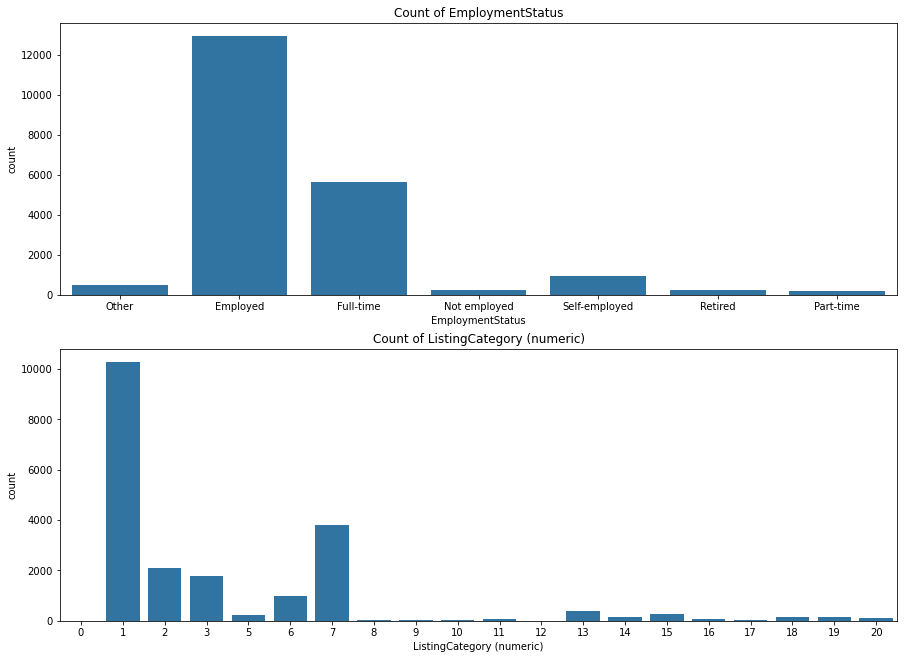

In [100]:
fig, ax = plt.subplots(nrows=2, figsize = [15,11])
sb.countplot(data = df_loans, x = 'EmploymentStatus', color = base_color, ax = ax[0])
sb.countplot(data = df_loans, x = 'ListingCategory (numeric)', color = base_color, ax = ax[1])
ax[0].title.set_text("Count of EmploymentStatus")
ax[1].title.set_text("Count of ListingCategory (numeric)")
plt.show()

## Box pot of LoanOriginalAmount vs the LoanStatus
* We can observe that the loan debtors with the highest amount of loan completed their loan repayment, and
* Those with lower amount of LoanOriginalAmount defaulted to not being able to pay their loan amount


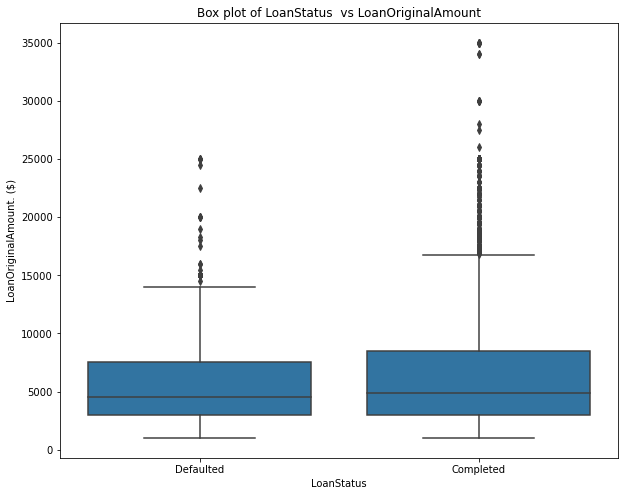

In [19]:
plt.figure(figsize=(10,8))
sb.boxplot(data= df_loans, x='LoanStatus', y='LoanOriginalAmount', color=base_color)
plt.title('Box plot of LoanStatus  vs LoanOriginalAmount')
plt.xlabel('LoanStatus')
plt.ylabel('LoanOriginalAmount. ($)');

## ProsperRating vs EmploymentStatus, and EmployementStatus vs LoanStatus
* There is a low ProsperRating for Borrower's of employment status Not employed, Self-employed, Retired, and Part-time. The count of rating for such employement status is between 0 to 100
* The second subplot shows that significant number of borrower's with employement status other, Employed, Full-time, Not employed completed their loan, while few defaulted


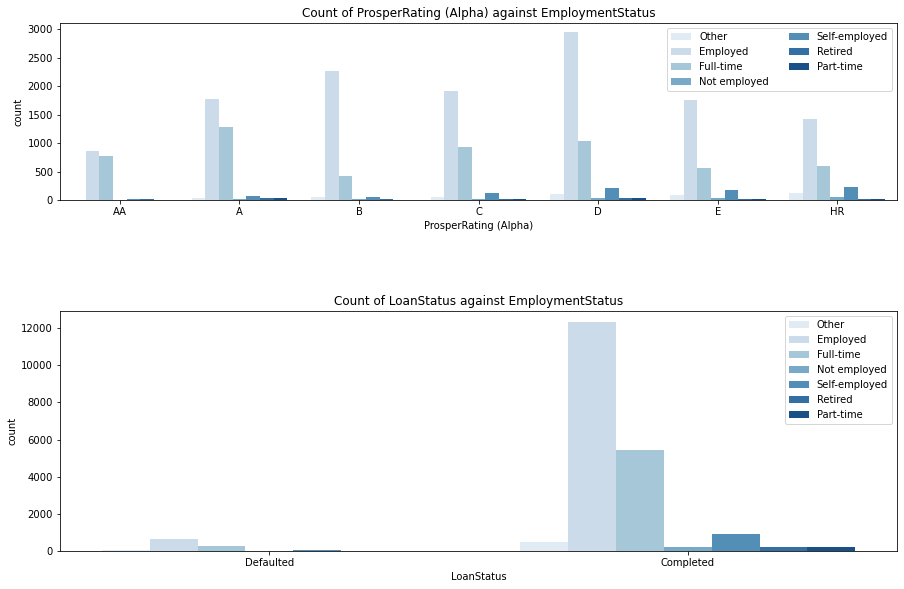

In [84]:
plt.figure(figsize = [15, 15])
ax1 = plt.subplot(4, 1, 1) # subplot 1: ProsperRating vs EmploymentStatus
ax1.title.set_text("Count of ProsperRating (Alpha) against EmploymentStatus")
sb.countplot(data = df_loans, x = 'ProsperRating (Alpha)', hue = 'EmploymentStatus', palette = 'Blues')
ax2 = plt.subplot(3, 1, 2) # subplot 2: LoanStatus vs. EmploymentStatus
sb.countplot(data = df_loans, x = 'LoanStatus', hue = 'EmploymentStatus', palette = 'Blues')
ax2.title.set_text("Count of LoanStatus against EmploymentStatus")
ax1.legend(ncol = 2);
ax2.legend(ncol = 1);

## Loan status vs ProsperRating, and LoanOriginalAmount
People with a rating of about A and AA gets better investment from investors. This is implies more investors are willing to spend their money on crediting people with good rating and history of loan completion

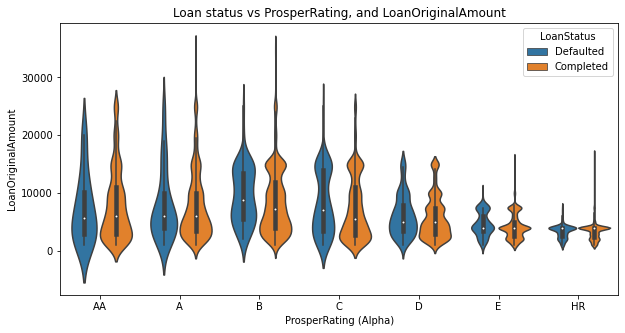

In [21]:
plt.figure(figsize = [10, 5])
sb.violinplot(data=df_loans, x='ProsperRating (Alpha)', y='LoanOriginalAmount', hue='LoanStatus');
plt.title("Loan status vs ProsperRating, and LoanOriginalAmount");

> To run this notebook outside Jupyter notebook, run the following command to generate a slide deck

`!jupyter nbconvert Part_II_slide_deck_template.ipynb.ipynb --to slides --post serve --no-input --no-prompt`

or 
`jupyter nbconvert Part_II_slide_deck_template.ipynb.ipynb --to slides`